# Breast Cancer Diagnosis - KNN and Logistic Regression

In [1]:
import sklearn
sklearn.__version__

'1.2.2'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 100)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn import preprocessing
from sklearn.utils import resample
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import recall_score

## The Data

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

### Load the dataset

- Since the dataset at the UCI repository does not have headers, we will read the data from the hard drive which I have modified.
- Last column is the target column.
- The ID column is already dropped.

In [6]:
df = pd.read_csv('wdbc.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
df.columns = ['id', 'diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

In [8]:
df.head()

,id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
X = df.drop(['id', 'diagnosis'], axis=1)

In [10]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The target vector is `y`.

In [11]:
y = df.diagnosis
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

How many people have cancer?

In [12]:
# code
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

212 people have malignant cancer.


Check the feature set `X` and investigate the column types. Is there any categorical data? Any missing values? 
How many observations? How many variables are there in the feature set (`X`)?

In [13]:
# code
# Checking for missing values 
X.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [14]:
# categorical data
cat_x = X.dtypes
cat_x

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [15]:
# Finding number of observations and number of columns
feat_obs = X.shape
feat_obs

(569, 30)

- No missing values. 
- No categorical variables. 
- 569 observations, 30 columns.

In [16]:
# code
# statistical summary
stat = df.describe()
stat

,id,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


1.The values are not at all close, they have a very large variation between them.
2."mean concave points" has minimum 25% percentile value.
3."mean area" has the largest mean of 654.89.

- There are large differences between the variables.
- `mean area` has the largest mean value
- `mean concave points` has the minimum 25% percentile value.

### Correlation

In [17]:
X.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [18]:
# code
# calculating correlation
correlation_x = X.corr()
correlation_x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


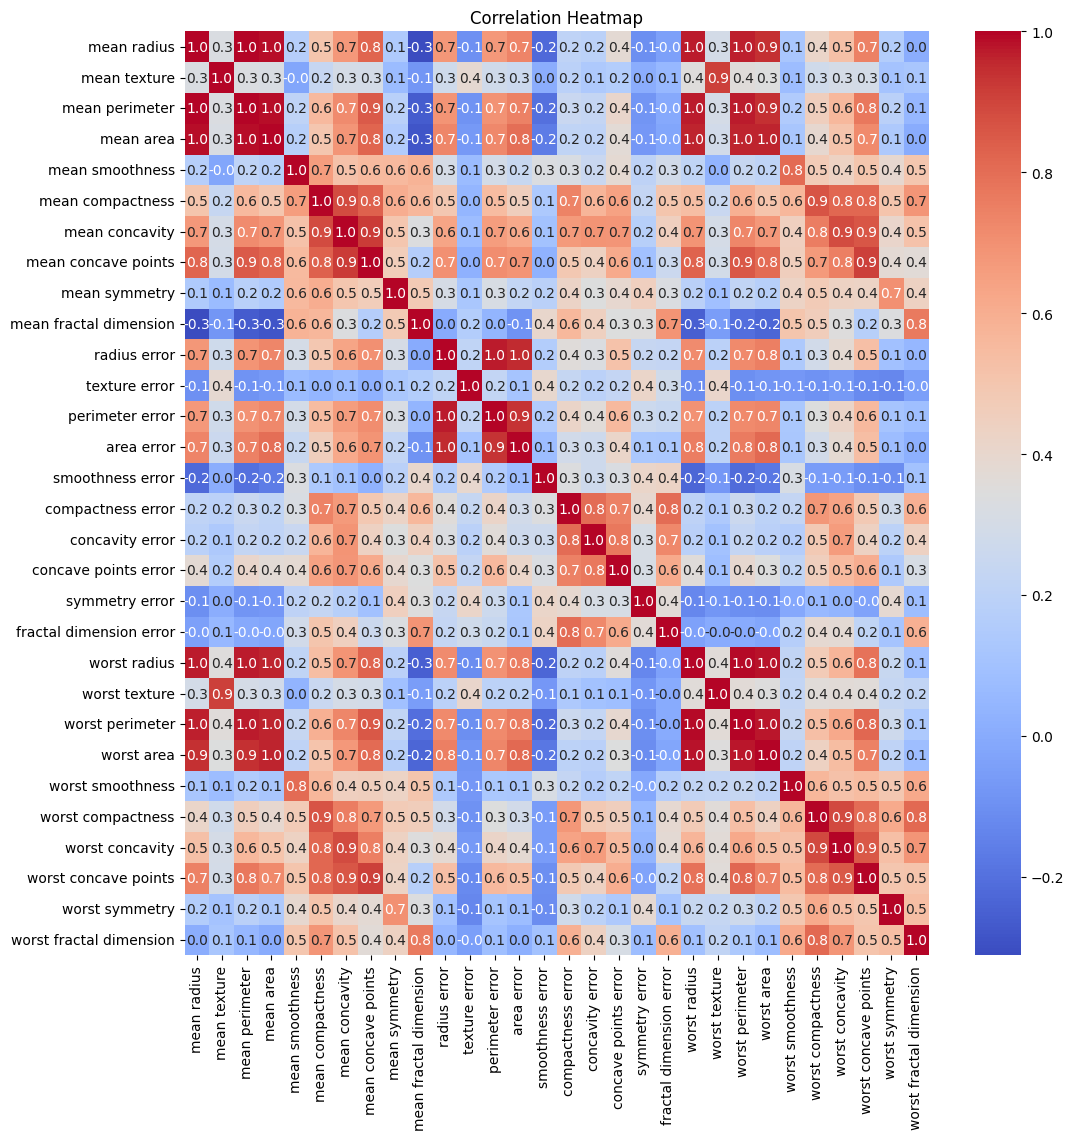

In [19]:
# heatmap for correlation
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(correlation_x, cmap='coolwarm', annot=True, fmt=".1f", ax=ax)
ax.set_title('Correlation Heatmap')
plt.show()

"mean area" is highly correlated with worst area, worst perimeter, worst area, mean perimeter and mean radius. 
"mean radius" is highly correlated with worst radius, worst perimeter, mean perimeter and mean area.
"mean perimeter" is highly correlated with worst radius, worst perimeter, mean radius and mean area.
"worst perimeter" is highly correlated with mean radius, mean perimeter, mean area, worst area and worst radius.
**From this we can see a pattern that mean area, worst area, worst perimeter, worst area, mean perimeter and mean radius are highly correlated with each other.**

### Train - Test split 

In [20]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [21]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [22]:
y = lb.fit_transform(y).ravel()

In [23]:
y = pd.Series(y)

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Length: 569, dtype: int32

In [25]:
# split the datasets into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 55, test_size= 0.25)

In [26]:
y_train.value_counts(normalize=True)

0    0.626761
1    0.373239
dtype: float64

In [27]:
y_test.value_counts(normalize=True)

0    0.629371
1    0.370629
dtype: float64

Stratified random sampling ensures that the splits keep their proportion of targets values. This is important to stay consistent with the data collected.

Now let's train a logistic regression model on the breast cancer data. This is a binary classification problem.

### Logisttic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
clf = LogisticRegression(max_iter = 10000, C=0.1)

In [32]:
# code
# Initiating Logistic Regression and fitting the model
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter = 10000, C=0.1)
clf.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=10000)

In [33]:
# making predictions
pred_tr = clf.predict(X_train)
pred_tr

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,

In [34]:
pred_ts = clf.predict(X_test)
pred_ts

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [35]:
# calculating training and testing accuracy scores
(y_train == pred_tr).mean()

0.9413145539906104

In [36]:
(y_test == pred_ts).mean()

0.986013986013986

Training acc = 0.941, Testing acc = 0.986

In [37]:
# Creating confusion matrix
confusion_tr = metrics.confusion_matrix(y_train, pred_tr)
confusion_tr

array([[257,  10],
       [ 15, 144]], dtype=int64)

In [38]:
# accuracy for test
confusion_ts = metrics.confusion_matrix(y_test, pred_ts)
confusion_ts

array([[89,  1],
       [ 1, 52]], dtype=int64)

In [39]:
# Recall(Sensitivity)
recall = recall_score(y_test, pred_ts)
recall

0.9811320754716981

In [40]:
# Precision
precision = metrics.precision_score(y_test, pred_ts)
precision

0.9811320754716981

In [41]:
# Calculating F1 score
f1score = metrics.f1_score(y_test, pred_ts)
f1score

0.9811320754716981

In [42]:
# Specificity
TN = 89
FP = 1
specificity = TN/(TN+FP)
specificity

0.9888888888888889

In [43]:
# False positive rate
FP =1
TN=89
FPR = FP/(FP+TN)
FPR

0.011111111111111112

### K Nearest Neighbor

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
clf = KNeighborsClassifier(n_neighbors=1)

In [46]:
# code
# Initiating the classifier and fitting the model
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

In [47]:
knn = clf.fit(X_train, y_train)

In [48]:
# predictions
pred_knn = clf.predict(X_train)
pred_knn

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,

In [49]:
# predicting test data
predts_knn = clf.predict(X_test)
predts_knn

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1])

In [50]:
# accuracy(train)
(y_train == pred_knn).mean()

1.0

In [51]:
# accuracy(test)
(y_test == predts_knn).mean()

0.9440559440559441

In [52]:
# Confusion matrices
knn_conf_tr = metrics.confusion_matrix(y_train, pred_knn)
knn_conf_tr

array([[267,   0],
       [  0, 159]], dtype=int64)

In [53]:
knn_conf_ts = metrics.confusion_matrix(y_test, predts_knn)
knn_conf_ts

array([[86,  4],
       [ 4, 49]], dtype=int64)

In [54]:
# Recall
recall_knn = recall_score(y_test, predts_knn)
recall_knn

0.9245283018867925

In [55]:
# Precision
precision_knn = metrics.precision_score(y_test, predts_knn)
precision_knn

0.9245283018867925

In [56]:
# F1 score
f1score_knn = metrics.f1_score(y_test, predts_knn)
f1score_knn

0.9245283018867925

In [57]:
# Specificity
TN = 86
FP = 4
specificity = TN/(TN+FP)
specificity

0.9555555555555556

In [61]:
# code
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

In [62]:
# Initializing empty lists
train_accuracy = []
test_accuracy = []

for c in C_list:
    # Logistic regression model 
    lr_mod = LogisticRegression(max_iter = 10000,C=c, random_state=123)
    
    # Fit the model on training set
    lr_mod.fit(X_train, y_train)
    
    # Predictions
    ytr_pred = lr_mod.predict(X_train)
    yts_pred = lr_mod.predict(X_test)
    
    # Calculating accuracy
    train_acc = metrics.accuracy_score(y_train, ytr_pred)
    # Testing
    test_acc = metrics.accuracy_score(y_test, yts_pred)
    
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

# numpy array results
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)

# output
for i in range(len(C_list)):
    print(f"C: {C_list[i]}, Train accuracy: {train_accuracy[i]}, Test accuracy: {test_accuracy[i]}")

C:\Users\SRINI\anaconda3\envs\spyder\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C: 0.0001, Train accuracy: 0.9248826291079812, Test accuracy: 0.9370629370629371
C: 0.0005, Train accuracy: 0.931924882629108, Test accuracy: 0.958041958041958
C: 0.001, Train accuracy: 0.9413145539906104, Test accuracy: 0.9790209790209791
C: 0.005, Train accuracy: 0.9342723004694836, Test accuracy: 0.972027972027972
C: 0.01, Train accuracy: 0.9366197183098591, Test accuracy: 0.972027972027972
C: 0.05, Train accuracy: 0.9413145539906104, Test accuracy: 0.9790209790209791
C: 0.1, Train accuracy: 0.9413145539906104, Test accuracy: 0.986013986013986
C: 0.5, Train accuracy: 0.9460093896713615, Test accuracy: 0.993006993006993
C: 1, Train accuracy: 0.9483568075117371, Test accuracy: 0.993006993006993
C: 2, Train accuracy: 0.9507042253521126, Test accuracy: 0.986013986013986
C: 10, Train accuracy: 0.9624413145539906, Test accuracy: 0.986013986013986
C: 50, Train accuracy: 0.971830985915493, Test accuracy: 0.993006993006993
C: 100, Train accuracy: 0.9812206572769953, Test accuracy: 0.99300699

C:\Users\SRINI\anaconda3\envs\spyder\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


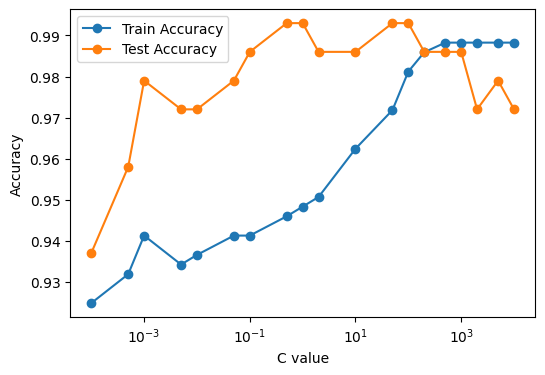

In [63]:
# Validation curve
plt.figure(figsize=(6, 4))
plt.plot(C_list, train_accuracy, 'o-', label='Train Accuracy')
plt.plot(C_list, test_accuracy, 'o-', label='Test Accuracy')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.show()

The output matches the expected output

For KNN

In [64]:
# code
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49]

In [65]:
# Initializing empty lists
train_accuracy = []
test_accuracy = []

for k in K_list:
    # KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Predictions
    y_train_pred_knn = knn.predict(X_train)
    y_test_pred_knn = knn.predict(X_test)
    
    # Accuracy
    train_acc_knn = metrics.accuracy_score(y_train, y_train_pred_knn)
    # For test
    test_acc_knn = metrics.accuracy_score(y_test, y_test_pred_knn)
    train_accuracy.append(train_acc_knn)
    test_accuracy.append(test_acc_knn)

# Numpy array results
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)

# output
for i in range(len(K_list)):
    print(f"K: {K_list[i]}, Train Accuracy: {train_accuracy[i]}, Test Accuracy: {test_accuracy[i]}")

K: 1, Train Accuracy: 1.0, Test Accuracy: 0.9440559440559441
K: 3, Train Accuracy: 0.9483568075117371, Test Accuracy: 0.965034965034965
K: 5, Train Accuracy: 0.9460093896713615, Test Accuracy: 0.9370629370629371
K: 7, Train Accuracy: 0.9389671361502347, Test Accuracy: 0.9440559440559441
K: 9, Train Accuracy: 0.931924882629108, Test Accuracy: 0.9370629370629371
K: 15, Train Accuracy: 0.9248826291079812, Test Accuracy: 0.9440559440559441
K: 19, Train Accuracy: 0.9272300469483568, Test Accuracy: 0.9440559440559441
K: 25, Train Accuracy: 0.9248826291079812, Test Accuracy: 0.9370629370629371
K: 29, Train Accuracy: 0.9225352112676056, Test Accuracy: 0.9370629370629371
K: 35, Train Accuracy: 0.9225352112676056, Test Accuracy: 0.9370629370629371
K: 39, Train Accuracy: 0.9225352112676056, Test Accuracy: 0.9300699300699301
K: 45, Train Accuracy: 0.9131455399061033, Test Accuracy: 0.9230769230769231
K: 49, Train Accuracy: 0.9084507042253521, Test Accuracy: 0.9300699300699301


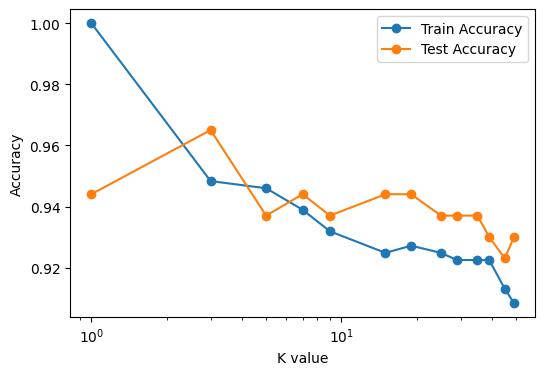

In [66]:
# Validation curve
plt.figure(figsize=(6, 4))
plt.plot(K_list, train_accuracy, 'o-', label='Train Accuracy')
plt.plot(K_list, test_accuracy, 'o-', label='Test Accuracy')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.show()

In [69]:
from sklearn import preprocessing

In [70]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

In [71]:
# code
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]

In [72]:
# Initializing empty lists
train_accuracy = []
test_accuracy = []

for c in C_list:
    # Logistic regression
    lr_model = LogisticRegression(max_iter = 10000,C=c, random_state=134)
    
    # Fit the model
    lr_model.fit(X_train_ss, y_train)
    
    # Predictions
    y_train_pred = lr_model.predict(X_train_ss)
    # For test
    y_test_pred = lr_model.predict(X_test_ss)
    
    # Accuracy
    train_acc = metrics.accuracy_score(y_train, y_train_pred)
    # test
    test_acc = metrics.accuracy_score(y_test, y_test_pred)
    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

# Numpy array results
train_accuracy = np.array(train_accuracy)
test_accuracy = np.array(test_accuracy)

# Output
for i in range(len(C_list)):
    print(f"C: {C_list[i]}, Train Accuracy: {train_accuracy[i]}, Test Accuracy: {test_accuracy[i]}")

C: 0.0001, Train Accuracy: 0.6455399061032864, Test Accuracy: 0.6363636363636364
C: 0.0005, Train Accuracy: 0.8356807511737089, Test Accuracy: 0.8671328671328671
C: 0.001, Train Accuracy: 0.8849765258215962, Test Accuracy: 0.9300699300699301
C: 0.005, Train Accuracy: 0.9460093896713615, Test Accuracy: 0.965034965034965
C: 0.01, Train Accuracy: 0.9483568075117371, Test Accuracy: 0.965034965034965
C: 0.05, Train Accuracy: 0.9788732394366197, Test Accuracy: 0.9790209790209791
C: 0.1, Train Accuracy: 0.9835680751173709, Test Accuracy: 0.986013986013986
C: 0.5, Train Accuracy: 0.9906103286384976, Test Accuracy: 0.986013986013986
C: 1, Train Accuracy: 0.9906103286384976, Test Accuracy: 0.9790209790209791
C: 2, Train Accuracy: 0.9929577464788732, Test Accuracy: 0.9790209790209791
C: 10, Train Accuracy: 0.9929577464788732, Test Accuracy: 0.9790209790209791
C: 50, Train Accuracy: 0.9929577464788732, Test Accuracy: 0.972027972027972
C: 100, Train Accuracy: 0.9929577464788732, Test Accuracy: 0.97

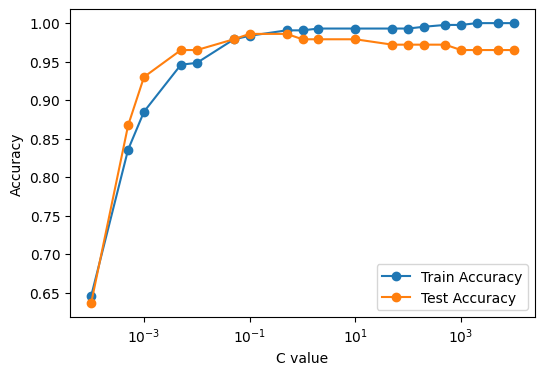

In [73]:
# Creating a validation curve
plt.figure(figsize=(6, 4))
plt.plot(C_list, train_accuracy, 'o-', label='Train Accuracy')
plt.plot(C_list, test_accuracy, 'o-', label='Test Accuracy')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.xscale('log')
plt.legend()
plt.show()

The validation curve is very interpretable compared to the last two outputs. We can clearly see the progess in the plot.

I would choose c with 0.5 since the training and test data very good accuracy values.

In [74]:
X_train_ss.shape

(426, 30)

In [75]:
# list(range(1, X_train_ss.shape[0]))
n=1
X_train_ss[0:n,:]

array([[-0.50323613,  1.73953408, -0.44053352, -0.49664617,  0.53358854,
         0.59839524,  0.25384105, -0.07259947,  0.47589812,  0.94655516,
         0.01943197,  1.10918571, -0.08331186, -0.11344568,  0.73341644,
         0.68332997,  0.17965816,  0.26900086, -0.2116796 ,  0.6599449 ,
        -0.12918496,  2.17946516, -0.1622508 , -0.19511526,  1.9967161 ,
         1.31027091,  0.79584853,  0.47330699,  0.45100311,  1.90561739]])

In [76]:
y_train

193    1
543    0
255    1
142    0
330    1
      ..
167    1
73     1
366    1
245    0
239    1
Length: 426, dtype: int32

In [77]:
accuracy_train = []
accuracy_test = []
for n in range(10, X_train_ss.shape[0]):
    clf = LogisticRegression(max_iter = 100, solver='lbfgs', penalty='l2', C=0.5, verbose=0)
    clf.fit(X_train_ss[0:n,:], y_train[0:n])
    pred_trn = clf.predict(X_train_ss[0:n,:])
    accuracy_train.append(metrics.accuracy_score(y_true = y_train[0:n], y_pred = pred_trn))
    pred_tst = clf.predict(X_test_ss)
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_tst))

In [78]:
# code
accuracy_train = []
accuracy_test = []
num_points = list(range(10, 426, 1))
for n in range(10, X_train_ss.shape[0]):
    clf = LogisticRegression(max_iter = 100, solver='lbfgs', penalty='l2', C=0.5, verbose=0)
    clf.fit(X_train_ss[0:n,:], y_train[0:n])
    pred_tr = clf.predict(X_train_ss[0:n,:])
    accuracy_train.append(metrics.accuracy_score(y_true = y_train[0:n], y_pred = pred_tr))
    pred_ts = clf.predict(X_test_ss)
    accuracy_test.append(metrics.accuracy_score(y_true = y_test, y_pred = pred_ts))

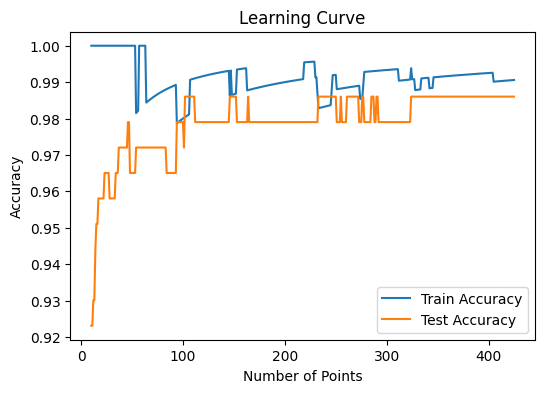

In [79]:
# learning curve
plt.figure(figsize=(6, 4))
plt.plot(num_points, accuracy_train, label='Train Accuracy')
plt.plot(num_points, accuracy_test, label='Test Accuracy')
plt.xlabel('Number of Points')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()

There is a lot of fluctuation in the learning curve. From 325 points it is perfectly stable.

### Improving Accuracy

Other ways to improve accuracy:
1. We can try to reduce the class imbalance
2. We can remove correlated variables

### Reducing class imbalance

In [80]:
y.value_counts()

0    357
1    212
dtype: int64

In [81]:
target = pd.DataFrame(y)
target.head()

,0
0,1
1,1
2,1
3,1
4,1


In [82]:
data = pd.concat((df, target), axis=1)

In [83]:
# Rename a column
data.rename(columns={0: 'Class'}, inplace=True)
data.head()

,id,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Class
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [85]:
data['Class'].value_counts()

0    357
1    212
Name: Class, dtype: int64

We can see that there classes are not balanced. We can clear the imbalance by undersampling the class '0'.

In [86]:
from sklearn.utils import resample

minor_class = data[data['Class'] == 1]
major_class = data[data['Class'] == 0]

# Undersampling the majority
unsamp_class = resample(major_class, replace=False, n_samples=len(minor_class), random_state=123)

# Combining undersampled majority class to the minor class
unsamp_df = pd.concat([minor_class, unsamp_class])
unsamp_df = unsamp_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Class distribution
print(unsamp_df['Class'].value_counts())

1    212
0    212
Name: Class, dtype: int64


Now the data is balanced, this would reduce bias and would improve the accuracy

In [89]:
X = unsamp_df.iloc[:,:32]
Y = unsamp_df["Class"]

In [91]:
X = X.drop(['id', 'diagnosis'], axis=1)

In [92]:
# spliting into training and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state = 55, test_size= 0.25)

In [93]:
y_train.value_counts()

0    159
1    159
Name: Class, dtype: int64

In [94]:
x_test

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
229,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,0.3897,1.0770,2.8730,43.950,0.004714,0.02015,0.03697,0.011100,0.01237,0.002556,21.53,38.54,145.40,1437.0,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075
106,19.81,22.15,130.00,1260.0,0.09831,0.10270,0.14790,0.09498,0.1582,0.05395,0.7582,1.0170,5.8650,112.400,0.006494,0.01893,0.03391,0.015210,0.01356,0.001997,27.32,30.88,186.80,2398.0,0.15120,0.31500,0.53720,0.23880,0.2768,0.07615
317,14.81,14.70,94.66,680.7,0.08472,0.05016,0.03416,0.02541,0.1659,0.05348,0.2182,0.6232,1.6770,20.720,0.006708,0.01197,0.01482,0.010560,0.01580,0.001779,15.61,17.58,101.70,760.2,0.11390,0.10110,0.11010,0.07955,0.2334,0.06142
97,10.26,16.58,65.85,320.8,0.08877,0.08066,0.04358,0.02438,0.1669,0.06714,0.1144,1.0230,0.9887,7.326,0.010270,0.03084,0.02613,0.010970,0.02277,0.005890,10.83,22.04,71.08,357.4,0.14610,0.22460,0.17830,0.08333,0.2691,0.09479
110,17.06,21.00,111.80,918.6,0.11190,0.10560,0.15080,0.09934,0.1727,0.06071,0.8161,2.1290,6.0760,87.170,0.006455,0.01797,0.04502,0.017440,0.01829,0.003733,20.99,33.15,143.20,1362.0,0.14490,0.20530,0.39200,0.18270,0.2623,0.07599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
254,22.01,21.90,147.20,1482.0,0.10630,0.19540,0.24480,0.15010,0.1824,0.06140,1.0080,0.6999,7.5610,130.200,0.003978,0.02821,0.03576,0.014710,0.01518,0.003796,27.66,25.80,195.00,2227.0,0.12940,0.38850,0.47560,0.24320,0.2741,0.08574
202,13.15,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.03483,0.1822,0.06207,0.2710,0.7927,1.8190,22.790,0.008584,0.02017,0.03047,0.009536,0.02769,0.003479,14.77,20.50,97.67,677.3,0.14780,0.22560,0.30090,0.09722,0.3849,0.08633
358,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.3980,74.080,0.005225,0.01308,0.01860,0.013400,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
344,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,0.05708,0.2116,1.3600,1.5020,16.830,0.008412,0.02153,0.03898,0.007620,0.01695,0.002801,13.89,35.74,88.84,595.7,0.12270,0.16200,0.24390,0.06493,0.2372,0.07242


In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [97]:
# Logistic regression model
lr_mod2 = LogisticRegression(max_iter = 10000, random_state=123)

# fit the model to the training data
lr_mod2.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=123)

In [99]:
# Making predictions on testing data
predtest_2 = lr_mod.predict(x_test)
predtest_2

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [100]:
# Confusion Matrix
metrics.confusion_matrix(y_test, predtest_2)

array([[53,  0],
       [ 3, 50]], dtype=int64)

In [101]:
# Classification Report
print(metrics.classification_report(y_test, predtest_2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       1.00      0.94      0.97        53

    accuracy                           0.97       106
   macro avg       0.97      0.97      0.97       106
weighted avg       0.97      0.97      0.97       106



### Removing highly correlated variables to avoid multicollinearity

In [102]:
# Removing highly correlated variables to avoid multicollinearity
X = X.drop(["mean radius","mean perimeter"], axis = 1)

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean texture             424 non-null    float64
 1   mean area                424 non-null    float64
 2   mean smoothness          424 non-null    float64
 3   mean compactness         424 non-null    float64
 4   mean concavity           424 non-null    float64
 5   mean concave points      424 non-null    float64
 6   mean symmetry            424 non-null    float64
 7   mean fractal dimension   424 non-null    float64
 8   radius error             424 non-null    float64
 9   texture error            424 non-null    float64
 10  perimeter error          424 non-null    float64
 11  area error               424 non-null    float64
 12  smoothness error         424 non-null    float64
 13  compactness error        424 non-null    float64
 14  concavity error          4

In [107]:
# spliting into training and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, stratify=Y, random_state = 55, test_size= 0.25)

In [110]:
# Logistic regression model
lr_mod3 = LogisticRegression(max_iter = 10000, random_state=123)

# fit the model to the training data
lr_mod3.fit(x_train, y_train)

LogisticRegression(max_iter=10000, random_state=123)

In [111]:
# Making predictions on testing data
predtest_3 = lr_mod3.predict(x_test)
predtest_3

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

In [112]:
# Confusion Matrix
metrics.confusion_matrix(y_test, predtest_3)

array([[52,  1],
       [ 4, 49]], dtype=int64)

In [113]:
# Classification Report
print(metrics.classification_report(y_test, predtest_3))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        53
           1       0.98      0.92      0.95        53

    accuracy                           0.95       106
   macro avg       0.95      0.95      0.95       106
weighted avg       0.95      0.95      0.95       106



The two methods which I tried did not improve the accuracy value, there was a little decrease in accuracy for each step.